In [45]:
library(lattice)
library(dplyr)
library(reshape2)

ad=read.csv2("C:\\Users\\Daniel\\Google Drive\\Projects\\MYB case\\ACCOUNTDATA_TRAIN.CSV",sep = ',')
cd=read.csv2("C:\\Users\\Daniel\\Google Drive\\Projects\\MYB case\\CALLDENTREDATA_TRAIN.CSV",sep = ',',stringsAsFactors = FALSE)
td=read.csv2("C:\\Users\\Daniel\\Google Drive\\Projects\\MYB case\\CUSTOMERDATA_TRAIN.CSV",sep = ',',stringsAsFactors = FALSE)
ld=read.csv2("C:\\Users\\Daniel\\Google Drive\\Projects\\MYB case\\LEASINGDATA_TRAIN.CSV",sep = ',')
sd=read.csv2("C:\\Users\\Daniel\\Google Drive\\Projects\\MYB case\\SCOREDATA_TRAIN.CSV",sep = ',')

In [13]:
#account data
head(ad)

CustID,AccountID,Balance,Interest,Type
1000006,21592,2376.43,2,Funds
1000007,16789,1812.72,5,Funds
1000008,15567,3350.65,2,Funds
1000009,11907,1191.82,4,Funds
1000018,20703,0,2,Funds
1000019,5065,1487.97,3,Funds


In [21]:
any(is.na(ad))

[1] FALSE

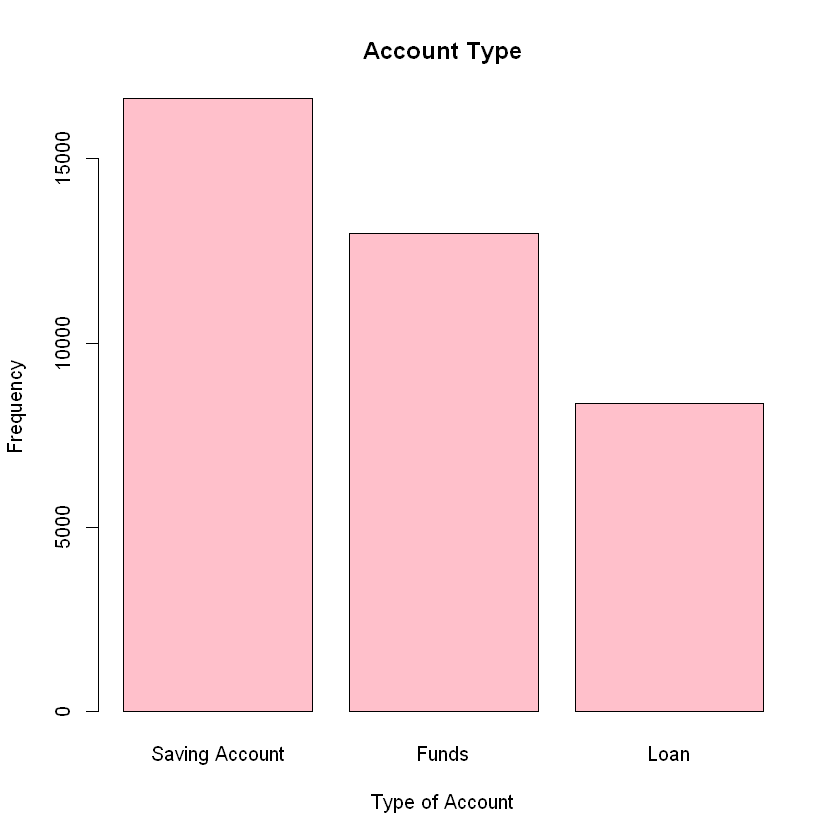

In [22]:
barplot(sort(table(ad$Type),decreasing = TRUE), main = 'Account Type',xlab = 'Type of Account',ylab = 'Frequency',col='pink')

In [33]:
ad1=dcast(ad,CustID~Type)
head(ad1)

Using Type as value column: use value.var to override.
Aggregation function missing: defaulting to length


CustID,Funds,Loan,Saving Account
1000002,0,1,1
1000005,0,0,1
1000006,1,0,0
1000007,1,0,1
1000008,1,0,0
1000009,1,1,1


In [34]:
head(cd)

CustID,ContactID,Date,Agent,Category,Day,Month
1000014,2,08APR2014:00:00:00,94,Complaint,8,APR
1000014,3,02MAR2014:00:00:00,56,Complaint,2,MAR
1000018,4,12JUN2014:00:00:00,28,Telebanking,12,JUN
1000028,5,23FEB2014:00:00:00,36,Telebanking,23,FEB
1000034,6,20MAR2014:00:00:00,24,Telebanking,20,MAR
1000035,7,24MAY2014:00:00:00,21,Telebanking,24,MAY


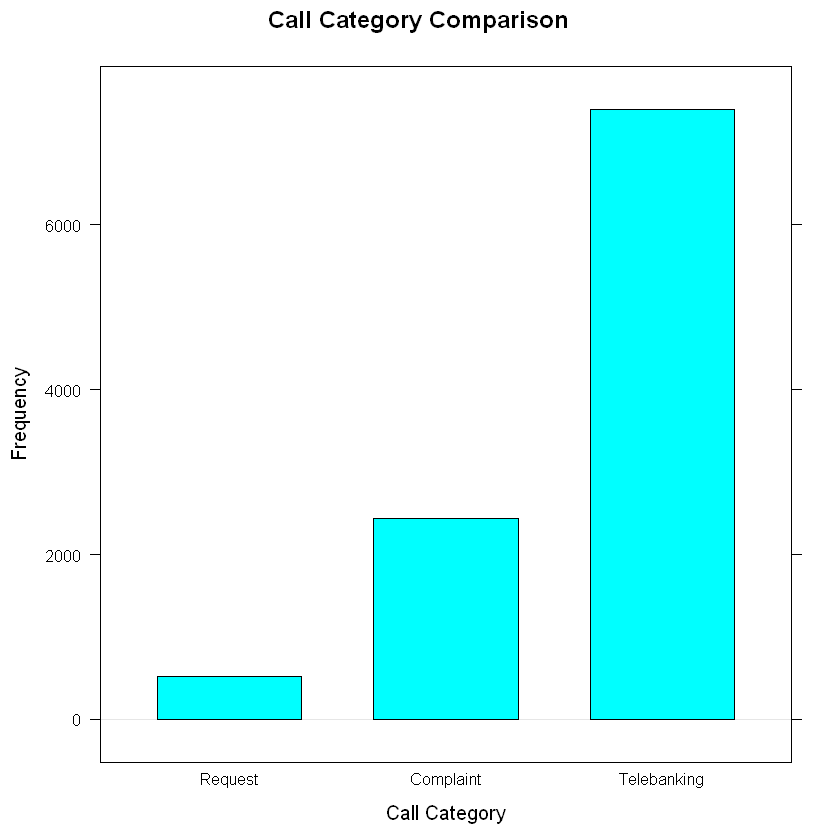

In [38]:
#call center data
cd$Day=substr(cd$Date,start = 1,stop = 2)
cd$Day=as.numeric(cd$Day)
cd$Month=substr(cd$Date,start = 3,stop = 5)
cd=filter(cd,Month!='JUL')
cd_mode=sort(table(cd$Category))
barchart(cd_mode,horizontal = FALSE,main='Call Category Comparison',xlab='Call Category',ylab='Frequency',decreasing=FALSE)

In [36]:
cd1=dcast(cd,CustID~Category+)
head(cd1)

Using Month as value column: use value.var to override.
Aggregation function missing: defaulting to length


CustID,Complaint,Request,Telebanking
1000014,2,0,0
1000018,0,0,1
1000028,0,0,1
1000034,0,0,1
1000035,0,0,2
1000037,1,0,0


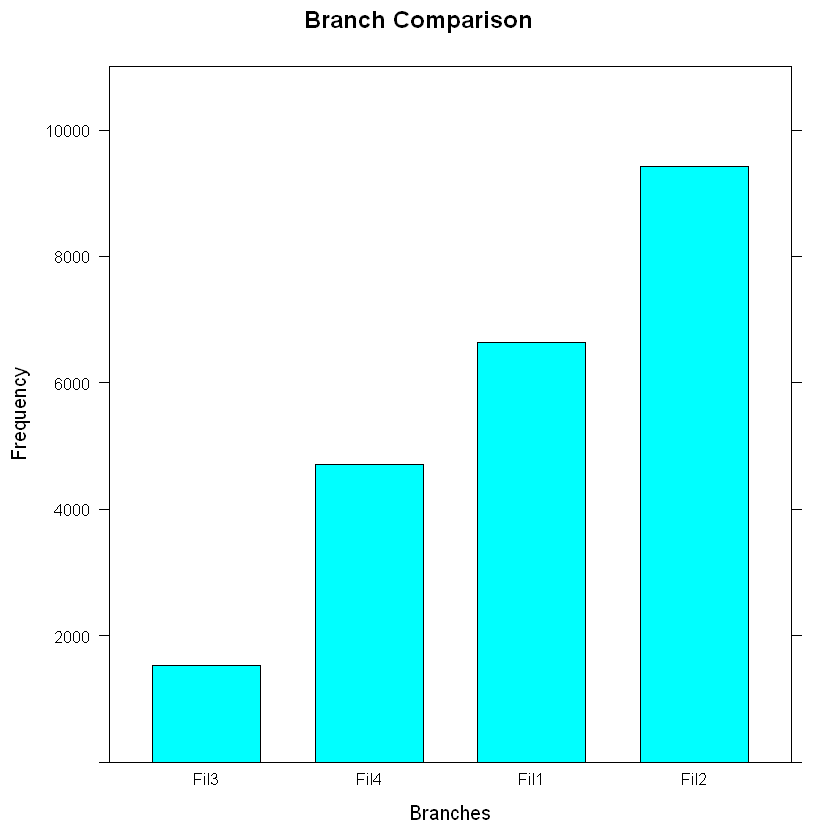

In [39]:
#customer data
barchart(sort(table(td$Branch)),horizontal=FALSE,main='Branch Comparison',xlab='Branches',ylab='Frequency',ylim=c(0:11000))

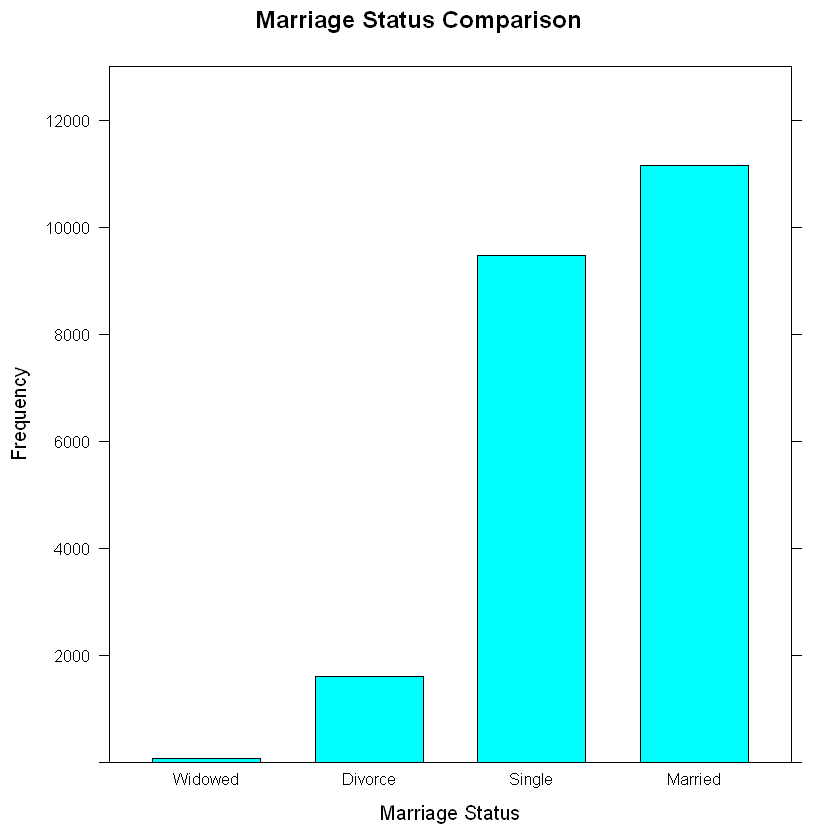

In [40]:
barchart(sort(table(td$MaritalStatus)),horizontal=FALSE,main='Marriage Status Comparison',xlab='Marriage Status',ylab='Frequency',ylim=c(0:13000))

In [46]:
head(td)

CustID,Birthdate,Title,Branch,CustomerSince,Gender,MaritalStatus
1000002,26DEC1958,,Fil1,01JAN2000,Male,Married
1000005,25JUN1947,Ing.,Fil4,01APR1999,Male,Single
1000006,10DEC1945,,Fil4,01SEP1996,Female,Married
1000007,02JUN1934,,Fil1,01SEP1997,Male,Married
1000008,15DEC1957,Dr.,Fil3,01JAN1996,Male,Single
1000009,11MAR1959,,Fil2,01JUL2001,Male,Single


In [47]:
##create age and royalty column
td$Birthdate=substr(td$Birthdate,start = 6,stop = 9)
td$Birthdate=as.numeric(td$Birthdate)
td$Age=2017-td$Birthdate
td$CustomerSince=substr(td$CustomerSince,start = 6,stop = 9)
td$CustomerSince=as.numeric(td$CustomerSince)
td$Royalty=2017-td$CustomerSince
head(td)

CustID,Birthdate,Title,Branch,CustomerSince,Gender,MaritalStatus,Age,Royalty
1000002,1958,,Fil1,2000,Male,Married,59,17
1000005,1947,Ing.,Fil4,1999,Male,Single,70,18
1000006,1945,,Fil4,1996,Female,Married,72,21
1000007,1934,,Fil1,1997,Male,Married,83,20
1000008,1957,Dr.,Fil3,1996,Male,Single,60,21
1000009,1959,,Fil2,2001,Male,Single,58,16


In [48]:
##missing data manipulation
sum(is.na(td$Age))/nrow(td)
sum(is.na(td$Royalty))/nrow(td)

[1] 0.02390242

[1] 0.01309476

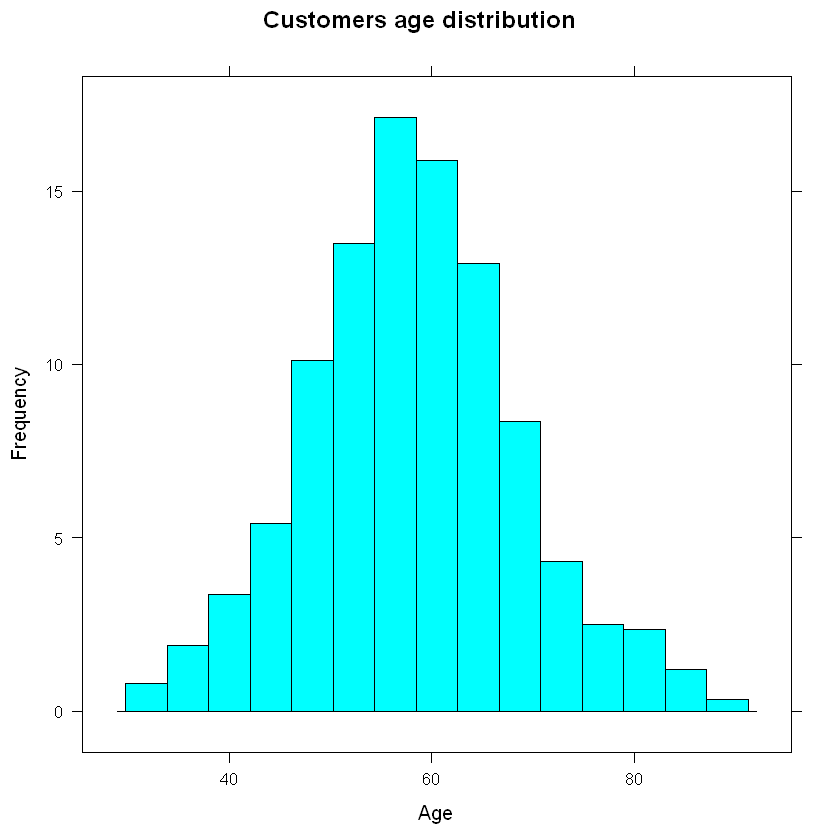

In [49]:
histogram(na.omit(td$Age),main='Customers age distribution',xlab = 'Age',ylab='Frequency')

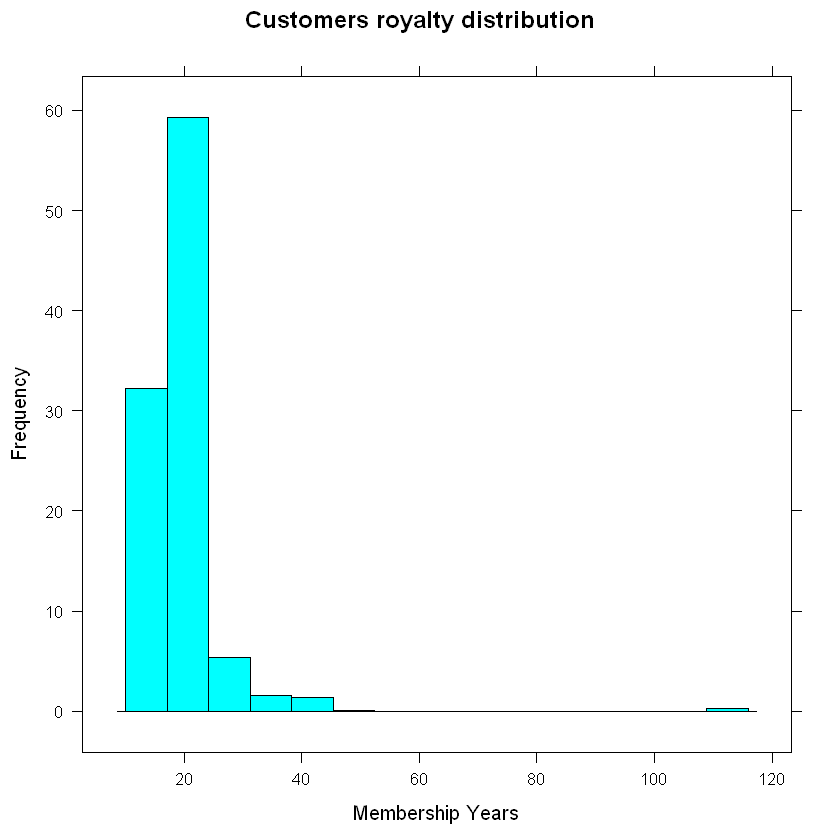

In [50]:
histogram(na.omit(td$Royalty),main='Customers royalty distribution',xlab = 'Membership Years',ylab='Frequency')

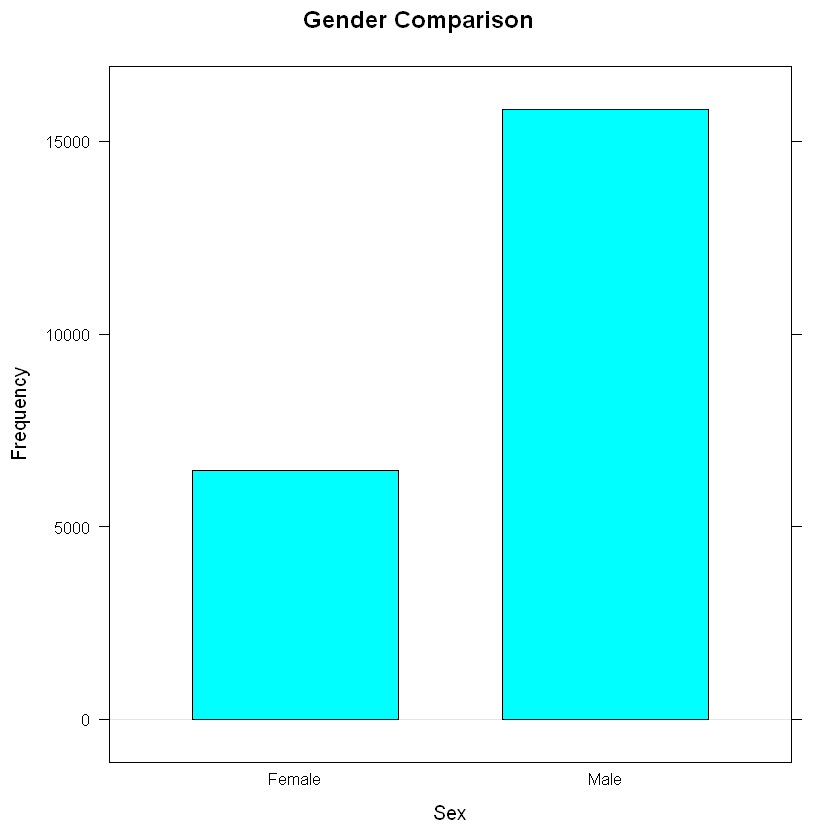

In [51]:
td_sex=sort(table(td$Gender))
barchart(td_sex,horizontal = FALSE, main='Gender Comparison', xlab='Sex', ylab='Frequency')

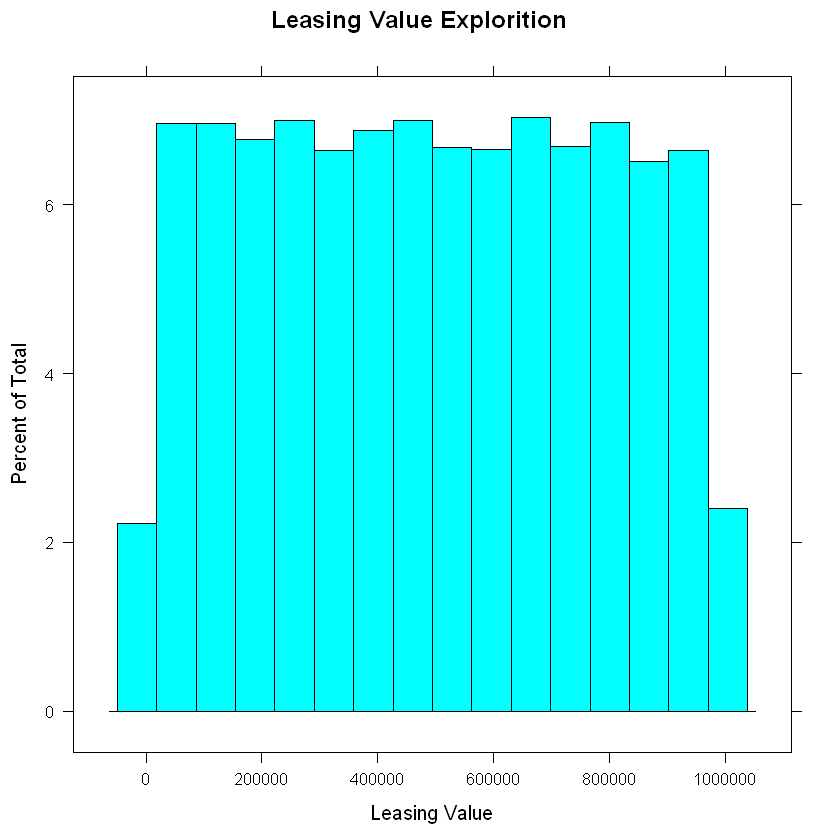

In [52]:
#leasing data
histogram(ld$Value,main='Leasing Value Explorition',xlab='Leasing Value')

In [74]:
ld1=ld[!duplicated(ld$CustID),]
head(ld1)

LeasingID,CustID,StartDate,EndDate,Value,AnnualRate
14309,1021021,03JUN2006:00:00:00,06NOV2019:00:00:00,416659,141.901982
20256,1030630,03JUN2006:00:00:00,05MAY2024:00:00:00,259553,206.17883832
21371,1032328,03JUN2006:00:00:00,09DEC2014:00:00:00,708508,126.65418946
2273,1002070,04JUN2006:00:00:00,09MAR2016:00:00:00,934375,263.01151962
2563,1002512,04JUN2006:00:00:00,20MAR2019:00:00:00,182268,182.61406802
4983,1006520,04JUN2006:00:00:00,21MAR2023:00:00:00,332047,57.859401727


In [75]:
ld1=ld1[-1]
head(ld1)

CustID,StartDate,EndDate,Value,AnnualRate
1021021,03JUN2006:00:00:00,06NOV2019:00:00:00,416659,141.901982
1030630,03JUN2006:00:00:00,05MAY2024:00:00:00,259553,206.17883832
1032328,03JUN2006:00:00:00,09DEC2014:00:00:00,708508,126.65418946
1002070,04JUN2006:00:00:00,09MAR2016:00:00:00,934375,263.01151962
1002512,04JUN2006:00:00:00,20MAR2019:00:00:00,182268,182.61406802
1006520,04JUN2006:00:00:00,21MAR2023:00:00:00,332047,57.859401727


In [58]:
sd=sd[-2]
head(sd)

CustID,ValueSegment,Date
1000148,0. NEW,01MAY2014
1000308,0. NEW,01JUN2014
1000308,0. NEW,01JUL2014
1000308,0. NEW,01AUG2014
1000336,0. NEW,01MAY2014
1000400,0. NEW,01JUN2014


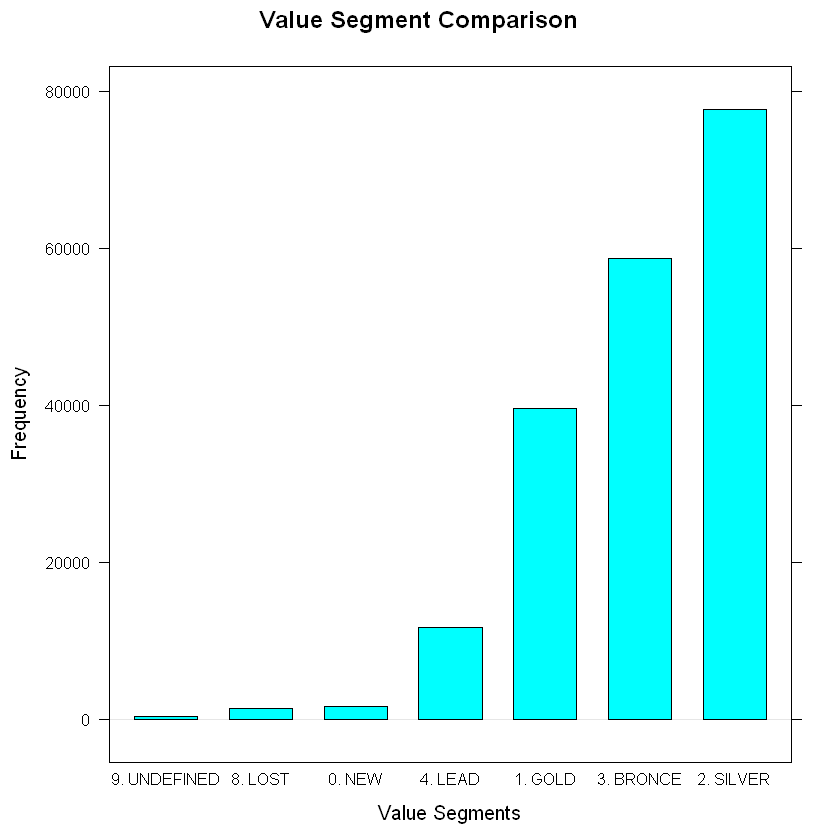

In [60]:
#score data
sd_vs=sort(table(sd$ValueSegment))
barchart(sd_vs,horizontal = FALSE,main='Value Segment Comparison',xlab='Value Segments',ylab='Frequency')

In [66]:
sd1=dcast(sd,CustID~ValueSegment)
head(sd1)

Using Date as value column: use value.var to override.
Aggregation function missing: defaulting to length


CustID,0. NEW,1. GOLD,2. SILVER,3. BRONCE,4. LEAD,8. LOST,9. UNDEFINED
1000002,0,1,4,2,0,1,0
1000005,0,1,0,4,0,0,0
1000006,0,2,1,5,0,0,0
1000007,0,3,5,0,0,0,0
1000008,0,2,4,2,0,0,0
1000009,0,2,0,5,1,0,0


In [76]:
tt=merge(td,ad1,by='CustID',all.td=TRUE)
tt=merge(tt,cd1,by='CustID',all.x=TRUE)
tt=merge(tt,sd1,by='CustID',all.x=TRUE)
tt=merge(tt,ld1,by='CustID',all.x=TRUE)
head(tt)

CustID,Birthdate,Title,Branch,CustomerSince,Gender,MaritalStatus,Age,Royalty,Funds,...,1. GOLD,2. SILVER,3. BRONCE,4. LEAD,8. LOST,9. UNDEFINED,StartDate,EndDate,Value,AnnualRate
1000002,1958,,Fil1,2000,Male,Married,59,17,0,...,1,4,2,0,1,0,12SEP2010:00:00:00,03APR2015:00:00:00,521763,254.69454187
1000005,1947,Ing.,Fil4,1999,Male,Single,70,18,0,...,1,0,4,0,0,0,17FEB2013:00:00:00,22JAN2020:00:00:00,855215,232.51593453
1000006,1945,,Fil4,1996,Female,Married,72,21,1,...,2,1,5,0,0,0,25FEB2013:00:00:00,17APR2028:00:00:00,560362,167.36627547
1000007,1934,,Fil1,1997,Male,Married,83,20,1,...,3,5,0,0,0,0,06OCT2010:00:00:00,07OCT2018:00:00:00,950047,84.376219214
1000008,1957,Dr.,Fil3,1996,Male,Single,60,21,1,...,2,4,2,0,0,0,19OCT2010:00:00:00,16APR2020:00:00:00,5276,109.1474312
1000009,1959,,Fil2,2001,Male,Single,58,16,1,...,2,0,5,1,0,0,15OCT2009:00:00:00,20MAR2016:00:00:00,243731,85.069300694


In [78]:
tt=tt[c(-3,-11)]
head(tt)
nrow(tt)

CustID,Birthdate,CustomerSince,Gender,MaritalStatus,Age,Royalty,Funds,Saving Account,Request,...,1. GOLD,2. SILVER,3. BRONCE,4. LEAD,8. LOST,9. UNDEFINED,StartDate,EndDate,Value,AnnualRate
1000002,1958,2000,Male,Married,59,17,0,1,NA,...,1,4,2,0,1,0,12SEP2010:00:00:00,03APR2015:00:00:00,521763,254.69454187
1000005,1947,1999,Male,Single,70,18,0,1,NA,...,1,0,4,0,0,0,17FEB2013:00:00:00,22JAN2020:00:00:00,855215,232.51593453
1000006,1945,1996,Female,Married,72,21,1,0,NA,...,2,1,5,0,0,0,25FEB2013:00:00:00,17APR2028:00:00:00,560362,167.36627547
1000007,1934,1997,Male,Married,83,20,1,1,NA,...,3,5,0,0,0,0,06OCT2010:00:00:00,07OCT2018:00:00:00,950047,84.376219214
1000008,1957,1996,Male,Single,60,21,1,0,NA,...,2,4,2,0,0,0,19OCT2010:00:00:00,16APR2020:00:00:00,5276,109.1474312
1000009,1959,2001,Male,Single,58,16,1,1,NA,...,2,0,5,1,0,0,15OCT2009:00:00:00,20MAR2016:00:00:00,243731,85.069300694


[1] 22299

In [80]:
write.csv(tt,'C:\\Users\\Daniel\\Google Drive\\Projects\\MYB case\\MYB.csv')